# **ВВЕДЕНИЕ**

В этом модуле мы продолжаем знакомство с моделями МО в области обучения с учителем. На этот раз поговорим о задаче классификации. Вспомним, где находится классификация на нашей карте машинного обучения:

![](https://lms.skillfactory.ru/assets/courseware/v1/2c3b5a00129b4dbedff6ed9fd2995cdb/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml1-3_2.png)

Вначале мы снова обратимся к классу линейных моделей и рассмотрим **логистическую регрессию**.

↓

Затем поговорим о **деревьях решений** для задачи классификации и научимся строить из этих деревьев целый лес.

# **Логистическая регрессия**

Ранее мы обсуждали модель линейной регрессии, которая предназначена для решения задачи регрессии. Теперь нам предстоит разобраться с тем, как преобразовать данную модель, чтобы она решала задачу классификации.

Для начала вспомним, что такое классификация.

                                        Задача классификации (classification) — задача, в которой мы пытаемся предсказать
                                        класс объекта на основе признаков в наборе данных. То есть задача сводится
                                        к предсказанию целевого признака, который является категориальным.


![](https://lms.skillfactory.ru/assets/courseware/v1/f1c52bc11a0e81a47e3096dfb2750fdc/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml1-3_9.png)

Когда **классов**, которые мы хотим предсказать, **только два**, классификация называется ***бинарной***. Например, мы можем предсказать, болен ли пациент раком, является ли изображение человеческим лицом, является ли письмо спамом и т. д.

Когда **классов**, которые мы хотим предсказать, **более двух**, классификация называется ***мультиклассовой*** (многоклассовой). Например, предсказание модели самолёта по радиолокационным снимкам, классификация животных на фотографиях, определение языка, на котором говорит пользователь, разделение писем на группы.

Для простоты мы пока разберёмся с бинарной классификацией, а в следующем юните обобщим результат на мультиклассовую.

Что вообще означает **«решить задачу классификации»**? Это значит **построить разделяющую поверхность в пространстве признаков, которая делит пространство на части, каждая из которых соответствует определённому классу**. 

Ниже представлены примеры разделяющих поверхностей, которые производят бинарную классификацию. Красным и синим цветом обозначены классы, зелёным — собственно поверхность, которая делит пространство признаков на две части. В каждой из этих частей находятся только наблюдения определённого класса.

![](https://lms.skillfactory.ru/assets/courseware/v1/295dc860fdc114b9449701a16f7b6200/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_1.png)

Модели, которые решают задачу классификации, называются **классификаторами** (classifier).

Если взять в качестве разделяющей поверхности некоторую плоскость (ровная поверхность на первом рисунке), то мы получаем модель логистической регрессии, которая тесно связана с рассмотренной нами ранее линейной регрессией.

Давайте для начала вспомним, как выглядит уравнение модели линейной регрессии в общем случае:

![](data\f1.png)

В общем случае это уравнение гиперплоскости, которая стремится приблизить зависимость целевой переменной от ***m*** факторов.

![](data\f2.png)

**Но всё это работает только в том случае, когда целевой признак ***y***, который мы хотим предсказать, является числовым, например цена, вес, время аренды и т. д.**

Что же делать с этой моделью, когда целевой признак  является категориальным? Например, является письмо спамом или обычным письмом?

Можно предположить, что, раз у нас есть две категории, мы можем обозначить категории за **y=1** (Спам) и **y=0** (Не спам) и обучить линейную регрессию предсказывать 0 и 1.

Но результат будет очень плохим. Выглядеть это будет примерно так:

![](https://lms.skillfactory.ru/assets/courseware/v1/a41a936873f275372356f53254e213d5/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_2.png)

Для больших значений ***x*** прямая будет выдавать значения больше 1, а для очень маленьких — меньше 0. Что это значит? Непонятно. Непонятно и то, что делать со значениями в диапазоне от 0 до 1. Да, можно относить значения на прямой выше 0.5 к классу 1, а меньше либо равным 0.5 — к классу 0, но это всё «костыли».

Идея! Давайте переведём задачу классификации в задачу регрессии. Вместо предсказания класса будем предсказывать вероятность принадлежности к этому классу. 

Модель должна выдавать некоторую вероятность ***P***, которая будет определять, принадлежит ли данный объект к классу 1: например, вероятность того, что письмо является спамом. При этом вероятность того, что письмо является обычным письмом (класс 0), определяется как ***Q = 1 - P***.  

Когда модель будет обучена на предсказание вероятности, мы зададим некоторый порог вероятности. Если предсказанная вероятность будет выше этого порога, мы определим объект к классу 1, а если ниже — к классу 0.

Например, стандартный порог равен 0.5. То есть если вероятность ***P > 0.5***, мы будем считать письмо спамом, а если ***P <= 0.5*** — обычным информативным письмом.

В итоге мы добьёмся того, что будем предсказывать не дискретный категориальный, а непрерывный числовой признак, который лежит в диапазоне [0, 1]. А это уже знакомая нам задача регрессии.

→ Однако остался главный вопрос: как научить модель предсказывать вероятности, ведь они должны лежать строго в диапазоне от 0 до 1, а предсказания линейной регрессии лежат в диапазоне от +∞ до -∞? 

Тут-то мы и приходим к модели логистической регрессии — **регрессии вероятностей**.

***
## **ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

Логистическая регрессия (Logistic Regression) — одна из простейших моделей для решения задачи классификации. Несмотря на простоту, модель входит в топ часто используемых алгоритмов классификации в Data Science.

В основе логистической регрессии лежит логистическая функция (logistic function) ***σ(z)***  — отсюда и название модели. Однако более распространённое название этой функции — сигмόида (sigmoid). Записывается она следующим образом:

![](data\f3.png)

А вот график её зависимости от аргумента ***z***:

![](https://lms.skillfactory.ru/assets/courseware/v1/17e5df54243ab349c94672502f9f4dd0/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_3.png)

В чём преимущество этой функции?

У сигмоиды есть два очень важных для нас свойства:

* Значения сигмоиды ***σ(z)*** лежат в диапазоне от 0 до 1 при любых значения аргумента ***z***: какой бы  вы ни подставили, число меньше 0 или больше 1 вы не получите.
* Сигмоида выдаёт значения σ(z) < 0.5 при её аргументе z < 0, σ(z) > 0.5 — при z > 0 и σ(z) = 0.5 — при z = 0.

Это ведь и есть свойства вероятности! Выходом сигмоиды является число от 0 до 1, которое можно интерпретировать как вероятность принадлежности к классу 1. Её мы и пытаемся предсказать.

Основная идея модели логистической регрессии: возьмём модель линейной регрессии (обозначим её выход за ***z***)

![](data\f4.png)

и подставим выход модели ***z*** в функцию сигмоиды, чтобы получить искомые оценки вероятности (**в математике принято писать оценочные величины с «шапкой» наверху, а истинные значения — без «шапки», это чистая формальность**):

![](data\f5.png)

*Примечание*. Далее в модуле мы будем называть оценки вероятности ***P^*** просто вероятностью, но только для краткости. Это не значит, что эти оценки являются истинными вероятностями принадлежности к каждому из классов (их нельзя сосчитать, так как для этого нужна выборка бесконечного объёма). Если вы употребляете термин «вероятности» на собеседованиях, обязательно предварительно укажите, что вы подразумеваете оценку вероятности.

Обучать будем всё в совокупности, пытаясь получить наилучшую оценку вероятности ***P^***. Если вероятность ***P^ > 0.5***, относим объект к классу 1, а если ***P^ <= 0.5***, относим объект к классу 0. 

Математически это записывается следующей формулой:

![](data\f6.png)

Примечание. В данном выражении ***I[P^]*** называется индикаторной функцией. Она возвращает 1, если её значение больше какого-то порога, и 0 — в противном случае. Математики часто записывают просто квадратные скобки, опуская символ I: ***[P]***.

Чего мы добились таким преобразованием?

Если мы обучим модель, то есть подберём  коэффициенты w0, w1, w2, ... , wm (как их найти, обсудим чуть позже) таким образом, что для объектов класса 1 модель линейной регрессии начнёт выдавать положительное число, а для класса 0 — выдавать отрицательное число, то тогда, подставив предсказание линейной регрессии  в сигмоиду, мы сможем получать вероятности принадлежности к каждому из классов в диапазоне от 0 до 1.

Далее по порогу вероятности мы сможем определять, к какому классу принадлежит объект.

Это и есть наша цель. Мы свели задачу классификации к задаче регрессии для предсказания вероятностей. 

Для бинарной классификации описанное выше будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/8e663f443f23b393252ae85246b5d23f/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_4.png)
***
Рассмотрим, как это работает, на примере.

Пусть мы каким-то образом обучили модель линейной регрессии предсказывать положительные числа для спам-писем и отрицательные — для обычных писем.

Подаём характеристики письма x1, x2, ..., xm в выражение для линейной регрессии и получаем ответ модели, например ***z = 1.5***. Тогда, подставив его в сигмоиду, получим:

![](data\f7.png)

Таким образом, вероятность того, что данный объект принадлежит классу спама, равна 0.82, что больше порогового значения 0.5. То есть мы относим данное письмо к спаму:  ***y^ = 1***.

Пусть теперь мы подали на вход модели характеристики другого письма и получили ***z = -0.91***. Тогда, подставив этот результат в сигмоиду, получим:

![](data\f8.png)

Вероятность того, что данный объект принадлежит классу спама, равна 0.28, что меньше порогового значения 0.5. Мы относим данное письмо к обычным письмам: ***y^ = 0***.

Кстати, вероятность того, что это письмо будет обычным, равна противоположной вероятности: Q = 1 - 0.28 = 0.72. 

Полученное выражение для оценки вероятности ***P^*** и будет называться моделью логистической регрессии:

![](data\f9.png)

***

**Разберёмся с геометрией**

Возьмём частный случай, когда класс объекта зависит от двух признаков — x1 и x2.

Рассмотрим пример.

Мы пытаемся предсказать поступление студента в университет в зависимости от результатов двух экзаменов. Целевой признак  — результат поступления в аспирантуру (admission outcome) с двумя возможными значениями: поступил или не поступил. Факторы: ***x1*** — результат сдачи первого экзамена (Exam1 Score) и ***x2*** — результат сдачи второго (Exam 2 Score). Будем предсказывать вероятность поступления с помощью логистической регрессии.

Изобразим зависимость в пространстве двух факторов (вид сверху) в виде диаграммы рассеяния, а целевой признак отобразим в виде точек (непоступившие) и крестиков (поступившие).

Если рассматривать уравнение линейной регрессии отдельно от сигмоиды, то геометрически построить логистическую регрессию на основе двух факторов — значит найти такие коэффициенты w0, w1, w2  уравнения плоскости, при которых наблюдается наилучшее разделение пространства на две части.

![](data\f10.png)

Тогда выражение для ***z*** будет задавать в таком пространстве плоскость (в проекции вида сверху — прямую), которая разделяет всё пространство на две части. Над прямой вероятность поступления будет > 0.5 , а под прямой < 0.5:

![](https://lms.skillfactory.ru/assets/courseware/v1/a8209513f0cfc3b554f494d79165269c/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_5.png)

Кулинарная аналогия

Возьмите по пригоршне риса и гречки и рассыпьте крупы на столе. Попытайтесь наложить лист бумаги вертикально на плоскость стола так, чтобы максимально качественно отделить виды круп друг от друга.

Лист бумаги и будет разделяющей плоскостью. Вам необходимо найти такое расположение листа, при котором разделение будет наилучшим.

![](https://lms.skillfactory.ru/assets/courseware/v1/77741a25b2f4998653c2af9b796d4bc8/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_6.png)

Коэффициенты построенной выше плоскости равны (как их найти, обсудим позже):

![](data\f11.png)

Тогда модель логистической регрессии будет иметь вид:

![](data\f12.png)

Появляется новый абитуриент, и мы хотим предсказать вероятность его поступления. Баллы студента: x1 = 67, x2 = 53. Заметьте, что точка с такими координатами находится ниже нашей плоскости (то есть абитуриент, скорее всего, не поступит).

Тогда:

![](data\f13.png)

Итак, оценка вероятности поступления студента составляет 0.32, то есть его шанс поступления составляет 32 %.

А что если мы возьмём точку, лежащую выше прямой?

Например, появился абитуриент с баллами x1 = 80, x2 = 75. Подставим его баллы в нашу модель логистической регрессии, чтобы понять, какова оценочная вероятность поступления:

![](data\f15.png)

Таким образом, оценка вероятности поступления абитуриента составляет 0.99, шанс поступления — 99 %.

**В чём математический секрет?**

Математически подстановка в уравнение плоскости точки, которая не принадлежит ей (находится ниже или выше), означает вычисление расстояния от этой точки до плоскости.

Если точка находится ниже плоскости, расстояние будет отрицательным (z < 0).
Если точка находится выше плоскости, расстояние будет положительным (z > 0).
Если точка находится на самой плоскости, (z = 0).
Мы знаем, что подстановка отрицательных чисел в сигмоиду приведёт к вероятности P^ < 0.5, а постановка положительных — к вероятности P^ > 0.5. 

Таким образом, ключевым моментом в предсказании логистической регрессии является расстояние от точки до разделяющей плоскости в пространстве факторов. Это расстояние в литературе часто называется **отступом (margin)**. 

В этом и состоит секрет работы логистической регрессии.

Чем больше расстояние от точки, находящейся выше разделяющей плоскости, до самой плоскости, тем больше оценка вероятности принадлежности к классу 1.

Попробуйте подставить различные координаты точек в модель логистической регрессии и убедитесь в этом.

Можно построить тепловую карту, которая показывает, чему равны вероятности в каждой точке пространства:

![](https://lms.skillfactory.ru/assets/courseware/v1/30baeed1eeb22b64aa28d75952115e87/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_7.png)

На рисунке точки, которые относятся к классу непоступивших абитуриентов, лежащие ниже разделяющей плоскости, находятся в красной зоне. Чем насыщеннее красный цвет, тем ниже вероятность того, что абитуриент поступит в аспирантуру. И наоборот, точки, которые относятся к классу поступивших абитуриентов, лежащие выше разделяющей плоскости, находятся в синей зоне. Чем насыщеннее синий цвет, тем выше вероятность того, что абитуриент поступит в аспирантуру.
***

Для случая зависимости целевого признака y от трёх факторов x1, x2 и x3, например от баллов за два экзамена и рейтинга университета, из которого выпустился абитуриент, выражение для z будет иметь вид:

![](data\f16.png)

Уравнение задаёт плоскость в четырёхмерном пространстве. Но если вспомнить, что  — категориальный признак и классы можно обозначить цветом, то получится перейти в трёхмерное пространство. Разделяющая плоскость будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/ecda661b626060bcc2c4dc6593249013/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_8.png)

В общем случае, когда у нас есть зависимость от  факторов, линейное выражение, находящееся под сигмоидой, будет обозначать разделяющую гиперплоскость.

![](data\f17.png)

## **ПОИСК ПАРАМЕТРОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ**

Итак, мы разобрались с тем, как выглядит модель логистической регрессии и что она означает в геометрическом смысле.

Но остался один главный вопрос: как найти такие коэффициенты w = (w0, w1, w2, ... , wm), чтобы гиперплоскость разделяла пространство наилучшим образом?

Вновь обратимся к нашей схеме минимизации эмпирического риска:

![](https://lms.skillfactory.ru/assets/courseware/v1/5fac5fe11d423f674949523e3db643c9/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml1-2_1.png)

Можно предположить, что стоит использовать метод наименьших квадратов. Введём функцию ошибки — средний квадрат разности MSE между истинными классами  и предсказанными классами  и попытаемся его минимизировать.

Сразу можно достоверно предсказать, что результат такого решения будет плохим, поэтому воздержимся от его использования.

Здесь нужен другой подход. Это метод максимального правдоподобия (Maximum Likelihood Estimation — MLE). 

**Правдоподобие** — это оценка того, насколько вероятно получить истинное значение целевой переменной ***y*** при данных ***x*** и параметрах ***w***. 

Данный метод позволяет получить функцию правдоподобия.

Цель метода — найти такие параметры w = (w0, w1, w2, ... , wm), в которых наблюдается максимум функции правдоподобия. Подробнее о выводе формулы вы можете прочитать [**здесь**](https://habr.com/ru/post/485872/).

А мы пока что опустим математические детали метода и приведём только конечную формулу:

![](data/f18.PNG)

Не пугайтесь. Давайте разберёмся, что есть что и как работает эта функция.

* **n** — количество наблюдений.
* **yi** — это истинный класс (1 или 0) для -ого объекта из набора данных.
* **P^i = σ (zi)** — предсказанная с помощью логистической регрессии вероятность принадлежности к классу 1 для i-ого объекта из набора данных.
* **zi** — результат подстановки i-ого объекта из набора данных в уравнение разделяющей плоскости **zi = w * xi**.
* log — логарифм (обычно используется натуральный логарифм по основанию e - ln).

![](data/f19.PNG)

Такие расчёты можно производить для любых значений параметров, меняется только оценка вероятности **P^i**.

*Примечание. К сожалению, функция likelihood не имеет интерпретации, то есть нельзя сказать, что значит число 2.34 в контексте правдоподобия.*

**Цель — найти такие параметры, при которых наблюдается максимум этой функции.**

Теперь пора снова применить магию математики, чтобы привести задачу к привычному нам формату минимизации эмпирического риска. По правилам оптимизации, если поставить перед функцией минус, то задача оптимизации меняется на противоположную: был поиск максимума — станет поиском минимума.

Таким образом мы получим функцию потерь ***L(w)***, которая носит название **«функция логистических потерь»**, или **logloss**, или **кросс-энтропия** (cross-entropy loss):

![](data/f20.PNG)

Вот эту функцию мы и будем минимизировать в рамках поиска параметров логистической регрессии. Мы должны найти такие параметры разделяющей плоскости  w, при которых наблюдается минимум logloss.

Знакомая задача? Всё то же самое, что и с линейной регрессией, только функция ошибки другая.

→ К сожалению, для такой функции потерь аналитическое решение оптимизационной задачи найти не получится: при расчётах получается, что его попросту не существует.

Но мы помним, что, помимо аналитических решений, есть и численные.

Например, для поиска параметров можно использовать знакомый нам градиентный спуск. Вспомним, как выглядит итерационная формула данного метода:

![](data/f21.PNG)

Повторим её смысл: новое значение параметров ***w^(k+1)*** получается путём сдвига текущих ***w^(k)*** в сторону вектора антиградиента - ***∇L(w^(k))***, умноженного на темп обучения ***η***.

Математическую реализацию вычисления градиента для logloss мы обсудим далее в курсе, а пока нас интересует исключительно его смысл.

Мы уже знаем, что для того, чтобы повысить шанс пройти мимо локальных минимумов функции потерь, используется не сам градиентный спуск, а его модификации: например, можно использовать уже знакомый нам стохастический градиентный спуск (SGD).

Помним, что применение градиентного спуска требует предварительного масштабирования данных (стандартизации/нормализации). В реализации логистической регрессии в sklearn предусмотрено ещё несколько методов оптимизации, для которых масштабирование не обязательно. О них мы упомянём в практической части модуля.

Во избежание переобучения модели в функцию потерь логистической регрессии традиционно добавляется регуляризация. В реализации логистической регрессии в sklearn она немного отличается от той, что мы видели ранее для линейной регрессии.

При L1-регуляризации мы добавляем в функцию потерь L(w) штраф из суммы модулей параметров, а саму функцию logloss умножаем на коэффициент ***C***:

![](data/f22.PNG)

А при L2-регуляризации — штраф из суммы квадратов параметров:

![](data/f23.PNG)

Значение коэффициента ***C*** — коэффициент, обратный коэффициенту регуляризации. Чем больше ***C***, тем меньше «сила» регуляризации.

***

Предлагаем вам посмотреть на то, как будет меняться форма сигмоиды, разделяющей плоскости при минимизации функции потерь logloss (она обозначена как cross-entropy в виде концентрических кругов — вид сверху), с помощью обычного градиентного спуска (не стохастического) в виде анимации.

![](https://lms.skillfactory.ru/assets/courseware/v1/bfdf530906dbc60202d51e4233e10185/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_12.gif)
![](https://lms.skillfactory.ru/assets/courseware/v1/dd3061bf76c343ce85ae577b688d7be9/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_13.gif)
![](https://lms.skillfactory.ru/assets/courseware/v1/dd3061bf76c343ce85ae577b688d7be9/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml3-2_14.gif)

Не волнуйтесь, все громоздкие формулы уже реализованы в классических библиотеках, таких как sklearn. Но нам важно понимать принцип того, что происходит «под капотом», чтобы верно интерпретировать результат и по возможности управлять им.

Теперь давайте перейдём к практической реализации логистической регрессии и решим с её помощью задачу классификации.

## **ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ В SKLEARN**

Мы будем работать со знакомым вам по модулю «Очистка данных» наборе данных о диабете, первоначально полученном в Национальном институте диабета, болезней органов пищеварения и почек.

Наша цель будет состоять в том, чтобы диагностически предсказать, есть ли у пациента диабет. На выбор экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь — женщины не моложе 21 года из индейского племени Пима.

В модуле по очистке данных вы уже производили очистку этого набора данных:

* удалили дубликаты,
* удалили неинформативный признак Gender,
* обработали «скрытые» пропуски в данных,
* избавились от потенциальных выбросов.

Очищенный датасет вы можете найти [здесь](https://lms.skillfactory.ru/assets/courseware/v1/c21dd892cc0cc4fba3976b2a91559ff0/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/diabetes_cleaned.zip).

Итак, импортируем библиотеки, необходимые нам для работы с данными:

In [9]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

# для логистической регрессии
from sklearn import linear_model #линейные модели

In [3]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


Напомним, какие признаки у нас есть:

* **Pregnancies** — количество беременностей;
* **Glucose** — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе;
* **BloodPressure** — диастолическое артериальное давление (мм рт. ст.);
* **SkinThickness** — толщина кожной складки трицепса (мм);
* **BMI** — индекс массы тела
* **DiabetesPedigreeFunction** — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости);
* **Age** — возраст;
* **Outcome** — наличие диабета (0 — нет, 1 — да), целевой признак.

In [4]:
print(diabetes_data.shape)

(757, 8)


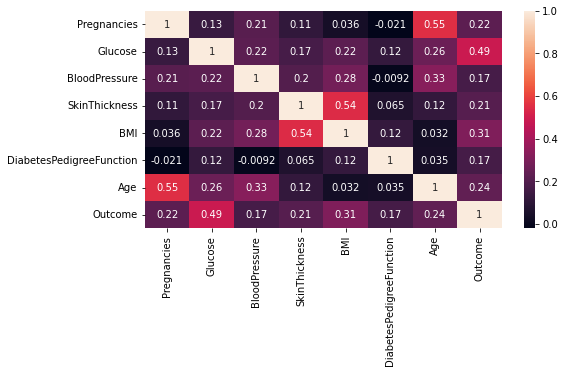

In [5]:
# Давайте посмотрим на матрицу корреляций и выберем наиболее коррелированные с целевым признаком факторы:
fig, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(diabetes_data.corr(), annot=True);

Из строки Outcome видно, что наибольшей корреляцией с целевым признаком обладают факторы Glucose (уровень глюкозы) и BMI (индекс массы тела).

Построим диаграмму рассеяния, по оси абсцисс отложим фактор Glucose, а по оси ординат — BMI. Сделаем цветовую группировку по признаку наличия диабета:

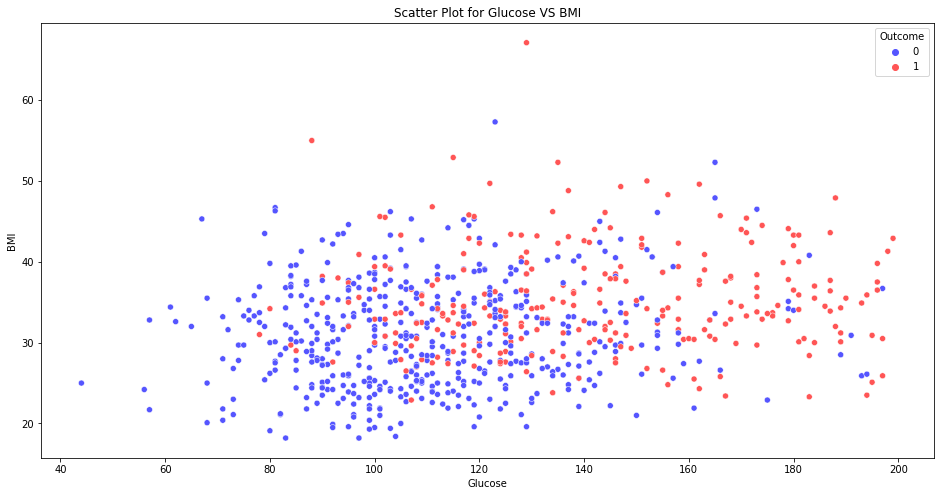

In [7]:
fig, ax = plt.subplots(figsize = (16, 8)) #фигура + координатная плоскость
#Строим диаграмму рассеяния
sns.scatterplot(
    data=diabetes_data, #датасет
    x='Glucose', #ось абсцисс
    y='BMI', #ось ординат
    hue='Outcome', #группировка
    palette='seismic', #палитра
    ax=ax, #координатная плоскость
);

#Задаём название графику
ax.set_title('Scatter Plot for Glucose VS BMI');

Видно, что классы довольно сильно перемешаны, но красные точки, соответствующие пациентам с диабетом, преимущественно сгруппированы в правой части системы координат.

Давайте попробуем построить разделяющую плоскость с помощью логистической регрессии.

Для начала разделим выборку на матрицу наблюдений X, состоящую из двух признаков, и столбец с правильным ответами y:

In [8]:
#Создаём матрицу наблюдений X и столбец с ответами y
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

Логистическая регрессия — линейная модель, поэтому она находится в уже знакомом нам модуле linear_model из библиотеки sklearn.  
***
В модуле находится класс LogisticRegression, который реализует поиск коэффициентов разделяющей плоскости путём минимизации функции потерь logloss различными численными методами.

**Основные параметры LogisticRegression**

* random_state — число, на основе которого происходит генерация случайных чисел.
* penalty — метод регуляризации. Возможные значения:
    * 'l1' — L1-регуляризация;  
    * 'l2' — L2-регуляризация (используется по умолчанию);  
    * 'elasticnet' — эластичная сетка (L1+L2);  
    * 'none' — отсутствие регуляризации.  
* C — коэффициент обратный коэффициенту регуляризации, то есть равен 1/α. Чем больше C, тем меньше регуляризация. По умолчанию C=1, тогда α=1.
* solver — численный метод оптимизации функции потерь logloss, может быть:
    * 'sag' — стохастический градиентный спуск (нужна стандартизация/нормализация);  
    * 'saga' — модификация предыдущего, которая поддерживает работу с негладкими функциями (нужна стандартизация/нормализация);  
    * 'newton-cg' — метод Ньютона с модификацией сопряжённых градиентов (не нужна стандартизация/нормализация);  
    * 'lbfgs' — метод Бройдена — Флетчера — Гольдфарба — Шанно (не нужна стандартизация/нормализация; используется по умолчанию, так как из всех методов теоретически обеспечивает наилучшую сходимость);  
    * 'liblinear' — метод покоординатного спуска (не нужна стандартизация/нормализация).  
* max_iter — максимальное количество итераций, выделенных на сходимость.
***
Обучим логистическую регрессию, сделав значением параметра random_state, например, число **42** (традиционное число, которое означает ответ на вопрос о смысле жизни), чтобы гарантировано получить одинаковые результаты. Остальные параметры оставим по умолчанию.

Для обучения модели необходимо просто вызвать метод fit(), передав в него матрицу наблюдений X и вектор правильных ответов y.

Чтобы получить параметр w0, нужно обратиться к атрибуту intercept_, а вектор параметров  w1, w2, ...,wm  будет храниться в атрибуте **coef_** (так как в матрице X два фактора, то и коэффициента будет два):

In [10]:
#Создаём объект класса LogisticRegression
log_reg_2d = linear_model.LogisticRegression(random_state=42)
#Обучаем модель, минимизируя logloss
log_reg_2d.fit(X, y)
#Выводим результирующие коэффициенты
print('w0: {}'.format(log_reg_2d.intercept_)) #свободный член w0
print('w1, w2: {}'.format(log_reg_2d.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [-8.24898965]
w1, w2: [[0.03779275 0.0875742 ]]


*В отличие от линейной регрессии, коэффициенты логистической регрессии интерпретировать сложнее. Мы не будем этим заниматься.*

Как нам сделать предсказание вероятности наличия диабета у пациента?

Мы должны подставить значения факторов в уравнение разделяющей плоскости, а затем результат подставить в функцию сигмоиды. Как хорошо, что для этого есть метод **predict_proba()**.

Например, появился новый пациент с концентрацией глюкозы 180 мг/100мл и индексом массы тела в 51 кг/м^2. Мы хотим вычислить вероятность наличия/отсутствия диабета у данного пациента:

In [11]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание вероятностей:
y_new_proba_predict = log_reg_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 2)))

Predicted probabilities: [[0.05 0.95]]


c:\Users\local_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Метод predict_proba() возвращает сразу две вероятности: первая соответствует вероятности принадлежности к классу 0 (диабета нет), а вторая — вероятности принадлежности к классу 1 (диабет есть). Заметьте, что в сумме две вероятности дают 1, что вполне логично, так как события взаимоисключающие.

**Если мы хотим предсказать не вероятности, а сам класс** (1 или 0), нам пригодится метод **predict()**. По умолчанию метод predict() относит объект к классу 1, если вероятность принадлежности к классу 1 > 0.5, и к классу 0, если эта вероятность < 0.5.

In [12]:
#Значения концентрации глюкозы и индекса массы тела для пациента
x_new = [[180, 51]]
#Делаем предсказание класса:
y_new_predict = log_reg_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]


c:\Users\local_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Предсказанный класс равен 1: значит, модель считает, что данный пациент болеет диабетом.

Теперь построим визуализацию нашей модели.
***
Чтобы красиво визуализировать вероятности в виде тепловой карты, мы подготовили для вас специальную функцию — **plot_probabilities_2d()**.

Данная функция принимает три аргумента:

* X — матрица с наблюдениями,
* y — столбец с правильными ответами,
* model — модель, с помощью которой делается предсказание вероятностей.

In [16]:
#Функция для визуализации модели
def plot_probabilities_2d(X, y, model):
    #Генерируем координатную сетку из всех возможных значений для признаков
    #Glucose изменяется от x1_min = 44 до x2_max = 199, 
    #BMI — от x2_min = 18.2 до x2_max = 67.1
    #Результат работы функции — два массива xx1 и xx2, которые образуют координатную сетку
    xx1, xx2 = np.meshgrid(
        np.arange(X.iloc[:, 0].min()-1, X.iloc[:, 0].max()+1, 0.1),
        np.arange(X.iloc[:, 1].min()-1, X.iloc[:, 1].max()+1, 0.1)
    )
    #Вытягиваем каждый из массивов в вектор-столбец — reshape(-1, 1)
    #Объединяем два столбца в таблицу с помощью hstack
    X_net = np.hstack([xx1.reshape(-1, 1), xx2.reshape(-1, 1)])
    #Предсказываем вероятность для всех точек на координатной сетке
    #Нам нужна только вероятность класса 1
    probs = model.predict_proba(X_net)[:, 1]
    #Переводим столбец из вероятностей в размер координатной сетки
    probs = probs.reshape(xx1.shape)
    #Создаём фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize = (20, 10))
    #Рисуем тепловую карту вероятностей
    contour = ax.contourf(xx1, xx2, probs, 100, cmap='bwr')
    #Рисуем разделяющую плоскость — линию, где вероятность равна 0.5
    bound = ax.contour(xx1, xx2, probs, [0.5], linewidths=2, colors='black');
    #Добавляем цветовую панель 
    colorbar = fig.colorbar(contour)
    #Накладываем поверх тепловой карты диаграмму рассеяния
    sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=y, palette='seismic', ax=ax)
    #Даём графику название
    ax.set_title('Scatter Plot with Decision Boundary');
    #Смещаем легенду в верхний левый угол вне графика
    ax.legend(bbox_to_anchor=(-0.05, 1))

c:\Users\local_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


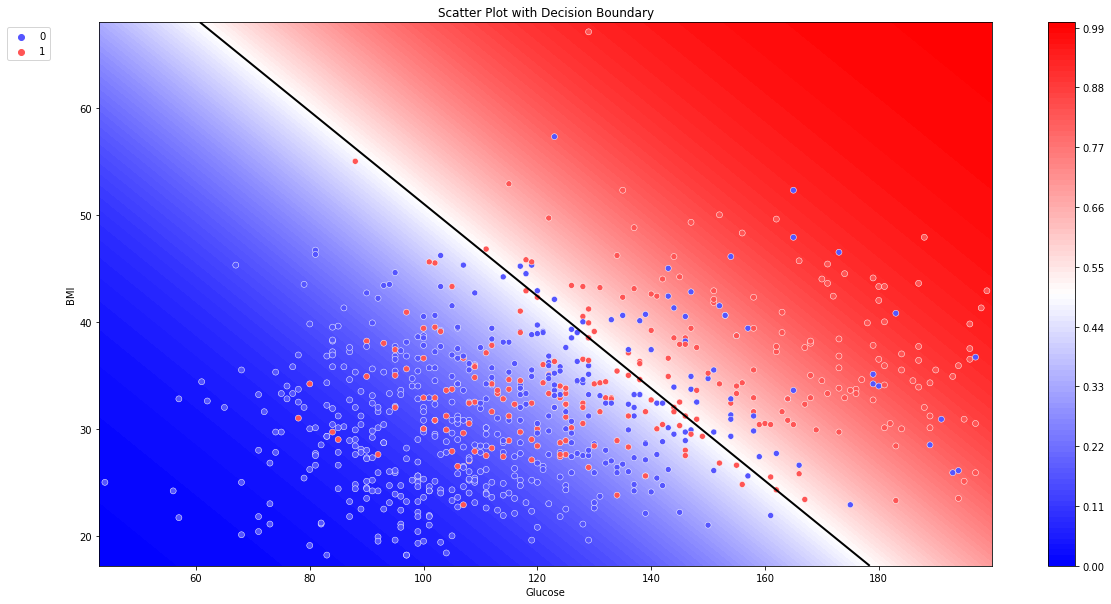

In [17]:
plot_probabilities_2d(X, y, log_reg_2d);

Из графика видно, что довольно много синих точек попали в красную зону и наоборот. Видимо, информации о двух факторах всё же маловато для того, чтобы хорошо провести классификацию.
***
Давайте будем использовать для построения модели всю предоставленную нам информацию — все факторы из набора данных. Для этого заново создадим матрицу наблюдений X и вектор ответов y:

In [18]:
#Создаём матрицу признаков X и столбец с ответами y
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

Затем обучим модель логистической регрессии с помощью метода **fit()**.

Сделаем предсказание вероятности заболевания диабетом для каждого пациента и самих классов с помощью методов **predict_proba()** и **predict()**.

In [19]:
#Создаём объект класса LogisticRegression
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000)
#Обучаем модель, минимизируя logloss
log_reg_full.fit(X, y)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X)

Затем добавим предсказание в таблицу X для наглядности:

In [20]:
#Создадим временную таблицу X
X_temp = X.copy()
#Добавим в эту таблицу результат предсказания
X_temp['Prediction'] = y_pred
X_temp.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Prediction
752,5,139.0,64.0,35.0,28.6,0.411,26,0
753,1,96.0,122.0,29.0,22.4,0.207,27,0
754,10,101.0,86.0,37.0,45.6,1.136,38,1
755,0,141.0,72.0,29.0,42.4,0.205,29,1
756,0,125.0,96.0,29.0,22.5,0.262,21,0


Итак, мы сделали предсказание для каждого наблюдения (пациента) из таблицы X.

К сожалению, теперь, когда признаков больше двух, построить красивую визуализацию разделяющей плоскости не получится.

→ Но как же тогда узнать, насколько хорошо модель определяет наличие диабета у пациента? Для этого используются метрики классификации, о которых мы поговорим в следующем юните.

## **ЗАДАЧА**

Таблица состоит из трёх столбцов:

* X_1 и X_2 — факторы;
* y — целевой признак.

Обучите модель логистической регрессии для предсказания целевого признака y. В качестве алгоритма оптимизации используйте стохастический градиентный спуск (масштабировать данные не нужно). В качестве значения параметра random_state возьмите число 42, остальные параметры оставьте по умолчанию.

Воспользуйтесь функцией **plot_probabilities_2d()**, которую мы объявили ранее. Постройте визуализацию разделяющей поверхности.

Сколько объектов класса 0 будут неверно отнесены моделью к классу 1?

,X_1,X_2,y
0,-0.869144,0.389310,0.0
1,-0.993467,-0.610591,0.0
2,-0.834064,0.239236,0.0
3,-0.136471,0.632003,1.0
4,0.403887,0.310784,1.0


c:\Users\local_admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


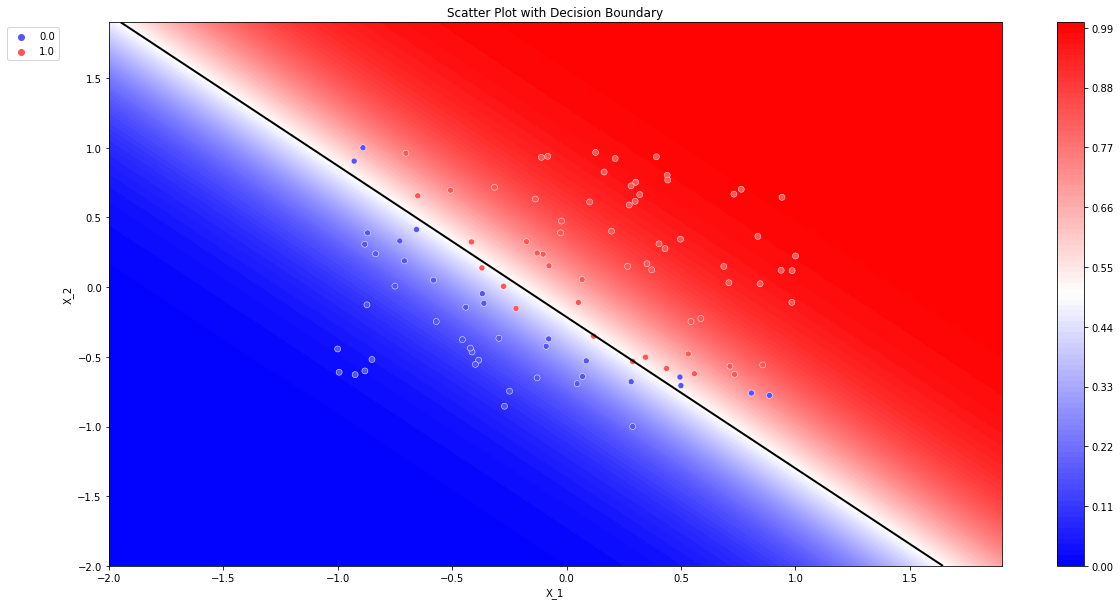

In [27]:
task_data = pd.read_csv('data/task_data.csv')
task_data=task_data.drop('SNo', axis=1)
display(task_data.head())
X = task_data[['X_1', 'X_2']]
y = task_data['y']
log_reg_2d = linear_model.LogisticRegression(random_state=42)
log_reg_2d.fit(X, y)


plot_probabilities_2d(X, y, log_reg_2d);